In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
try:
    import visuals as vs
except ImportError:
    ('Please try and relocate the visuals module')

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

C:\Users\Hello\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Hello\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [4]:
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print( "Statistics for Boston housing dataset:\n")
print('min price: ${:,.2f}'.format(minimum_price))
print('max price: ${:,.2f}'.format(maximum_price))
print('mean price: ${:,.2f}'.format(mean_price))
print( 'median of prices: ${:,.2f}'.format(median_price))
print("Standard deviation of prices: ${:,.2f} ".format(std_price))

Statistics for Boston housing dataset:

min price: $105,000.00
max price: $1,024,800.00
mean price: $454,342.94
median of prices: $438,900.00
Standard deviation of prices: $165,171.13 


**Answer:  

#1..I expect the ['MEDV'] to decrease based on a high a ['LSTAT'] value given the surrounding lower working class %
 
#2..Given a lower ['PTRATIO'] can also cause a lower value for the client.
           
#3..I expect the ['MEDV'] to increase given the increase of ['RM'] but ['RM'] does not interfere with ['MEDV']
           
           

**

In [8]:
# TODO: Import 'r2_score'
# y->FEATURES
def performance_metric(y_true, y_predict):
    from sklearn.metrics import r2_score
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [9]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


**Answer: 

   My model achieved a score of .923. Given the values it does seem to be a good fit and there is almost no variance, but has potential for underfitting. It is closer to a value of 1 so it will achieve accurate results for these parameter attributes inparticular.. If we had more data involved in the score will be able to generalize  better. Right now it seems like there is assuming involved given the low data and is most likely underfitting.

Giving too much irrelevant data it is possible that there will be potential for overfitting. **

In [11]:
# TODO: Import 'train_test_split'
#X,y = prices, features
# TODO: Shuffle and split the data into training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state=3, test_size=.2)


# Success
print("Training and testing split was successful.\n X Train \n")
print(X_train[:5],'\n y train \n',y_train[:5],'\n Xtest \n',X_test[:5],
      '\n y_test \n',y_test[:5])

Training and testing split was successful.
 X Train 

        RM  LSTAT  PTRATIO
334  6.014  10.53     18.8
107  6.127  14.09     20.9
59   5.927   9.22     19.7
244  6.957   3.53     19.1
10   6.377  20.45     15.2 
 y train 
 334    367500.0
107    428400.0
59     411600.0
244    621600.0
10     315000.0
Name: MEDV, dtype: float64 
 Xtest 
         RM  LSTAT  PTRATIO
126  5.613  27.26     19.1
255  7.206   8.10     13.0
102  6.405  10.63     20.9
299  4.973  12.64     18.4
170  5.859   9.64     16.6 
 y_test 
 126    329700.0
255    766500.0
102    390600.0
299    338100.0
170    474600.0
Name: MEDV, dtype: float64


**Answer:
    The benefit of splitting the training/testing is to help us by splitting the dataset into two pieces so that the model can gain a better'view' of the data. This way it is possible to realize if I have overfitting in the training data or not.Since the data has various floating points of prices and features, it might be best to use the K-fold algorithm to cluster the like  variables together. **

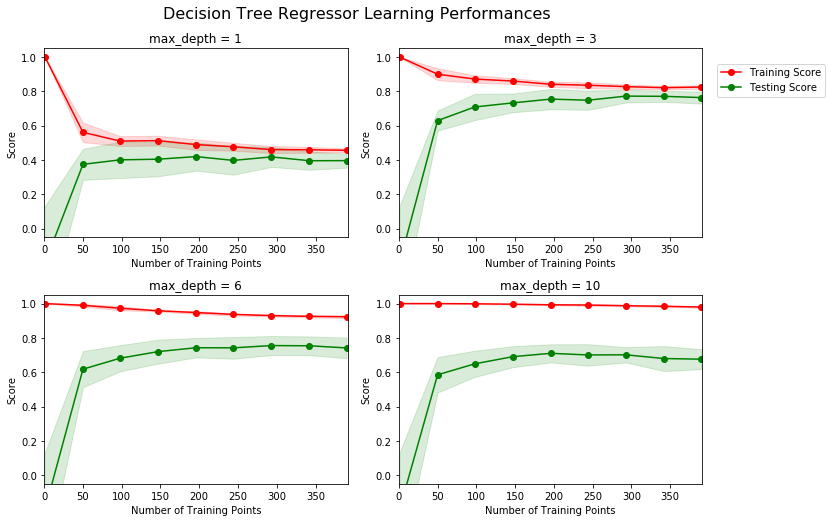

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

**Answer: 

   For the MAX_Depth(3) graph, the more training points added, the closer it gets to the testing score. If more training points get added to the model it is possible that there is going to be overfitting. Max_Depth(3) is a good model because the uncertain training data points are not touching the testing points and also have a score almost equal to 1 assuming the model will have accurate predictions and will hopefully be able to generalize well.**

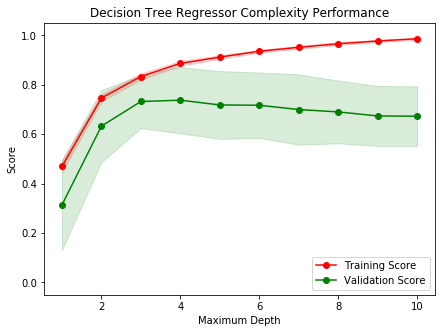

In [12]:
vs.ModelComplexity(X_train, y_train)

**Answer: When the model has a max_Depth of 1 the model suffers from high bias with not enough data to train on, when the model is trained on a max_Depth of 10 it has high variance and will overcomplicate the model.   **

**Answer:
    I think at max_Depth 4 is the best point for the tradeoff.Max_Depth 4 is in its own space to get well enough data while not converging with the unseen data .It seems like it's getting better as it increases but is not generalizing well. As it increases it will overcomplicate the model. False positives will be somewhat likely. **

**Answer: The 'grid search', searches over specified parameter values. Important attributes to the grid search are 'fit and predict'.The grid is a Dictionary list with parameters as keys and lists of parameters. The grids spanned by each dictionary in the list are explored. This will search over any sequence of parameter values.**

**Answer: K-fold cross validaton gives the train train/test indices oppurtunity to split data in train/test sets, must have atleast 2 folds.
Has two arrays:[training],[testing]. Using this we get less variance. With more data points we are able to achieve more accurate models. The main drawback of a grid search is that it has tendancy to overfit. K-fold helps alleviate this issue by dividing the data into folds.**

In [13]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 15, test_size = 0.20, random_state =None)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

C:\Users\peace\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Parameter 'max_depth' is 4 for the optimal model.


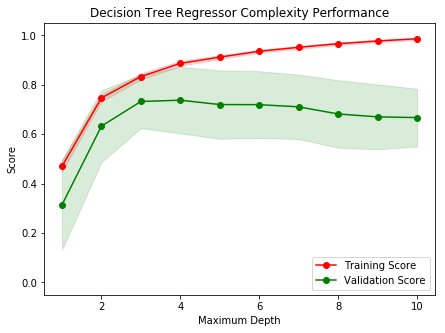

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
vs.ModelComplexity(X_train, y_train)

**Answer:I got a max Depth of 4 for the model. This model matches my guess in question-6.  **

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

In [12]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $420,622.22
Predicted selling price for Client 2's home: $235,122.22
Predicted selling price for Client 3's home: $896,280.00


**Answer: 

For *client3* having has the biggest house,best public school neighborhood,lowest poverty level should sell at:$896,280.00.

For *client2* having the smallest house,high poverty rate,not the best public schools should sell at:$235,122.22

For *client1* having a moderate size houese, moderate poverty level, and more rooms than client 2 should sell at:$420,622.22.
***

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [35]:
vs.PredictTrials(features, prices, fit_model, client_data),
print('^^^Final Range^^^')


Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $394,523.68
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $27,193.94
^^^Final Range^^^


**Answer: 

*I do not think this model will be accuarte enough for a real-world setting at the moment. 

*The model based on 1978 data which will have little relevance to today in 2017. People's needs change overtime.

*The model is only looking at the 3 features['RM','PTRATIO','LSTAT'] but is missing features that can make it more accurate and give better outcomes.

*The model could be improved on by adding more features such as a pool, land size, damages,known 'criminal activity' in the home, income, AGE, etc... should also factor in.

*The data collected would most likely not work in a rural area considering this data is based on various data collected from a specific area that is in an urban area and does not reference land size considering rural areas prefer more land than students to teachers.

*The model is robust enough to make predictions though considering the train has little to no difference from the test set achieving accurate results for this model but is underfitting drastically. Adding more relevant features is definitely needed.

**